In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [2]:
data=pd.read_csv("adult.csv")
df=data.copy()

In [3]:
df.tail()

,Age,workclass,fnlwgt,Education,Education-num,maritial status,occupation,relationship,Race,Gender,capital gain,capital loss,hours per week,native_country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [5]:
df.dtypes

Age                 int64
workclass          object
fnlwgt              int64
Education          object
Education-num       int64
maritial status    object
occupation         object
relationship       object
Race               object
Gender             object
capital gain        int64
capital loss        int64
hours per week      int64
native_country     object
salary             object
dtype: object

In [6]:
df.isnull().sum()

Age                0
workclass          0
fnlwgt             0
Education          0
Education-num      0
maritial status    0
occupation         0
relationship       0
Race               0
Gender             0
capital gain       0
capital loss       0
hours per week     0
native_country     0
salary             0
dtype: int64

In [7]:
df['workclass']=df['workclass'].astype('category') 
df['Education']=df['Education'].astype('category') 
df['maritial status']=df['maritial status'].astype('category') 
df['occupation']=df['occupation'].astype('category') 
df['relationship']=df['relationship'].astype('category') 
df['Race']=df['Race'].astype('category') 
df['Gender']=df['Gender'].astype('category') 
df['native_country']=df['native_country'].astype('category') 
df['salary']=df['salary'].astype('category') 

In [8]:
df.dtypes

Age                   int64
workclass          category
fnlwgt                int64
Education          category
Education-num         int64
maritial status    category
occupation         category
relationship       category
Race               category
Gender             category
capital gain          int64
capital loss          int64
hours per week        int64
native_country     category
salary             category
dtype: object

In [9]:
df['workclass']=df['workclass'].cat.codes
df['Education']=df['Education'].cat.codes
df['maritial status']=df['maritial status'].cat.codes
df['occupation']=df['occupation'].cat.codes
df['relationship']=df['relationship'].cat.codes
df['Race']=df['Race'].cat.codes
df['Gender']=df['Gender'].cat.codes
df['native_country']=df['native_country'].cat.codes
df['salary']=df['salary'].cat.codes

In [10]:
cor=df.corr()
cor

,Age,workclass,fnlwgt,Education,Education-num,maritial status,occupation,relationship,Race,Gender,capital gain,capital loss,hours per week,native_country,salary
Age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
Education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
Education-num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
maritial status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
Race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
Gender,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


<AxesSubplot:>

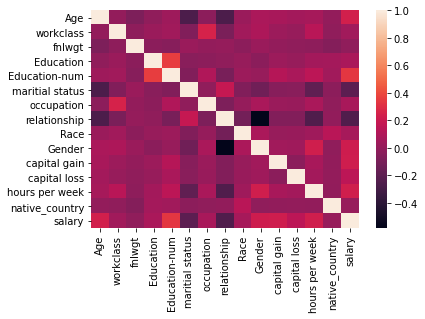

In [11]:
sns.heatmap(cor)

In [12]:
df1=df.copy()
df1=df1.drop(['fnlwgt','Education','Age','workclass','native_country','Race','occupation','relationship','hours per week'],axis=1)
df1.corr()

,Education-num,maritial status,Gender,capital gain,capital loss,salary
Education-num,1.000000,-0.069304,0.012280,0.122630,0.079923,0.335154
maritial status,-0.069304,1.000000,-0.129314,-0.043393,-0.034187,-0.199307
Gender,0.012280,-0.129314,1.000000,0.048480,0.045567,0.215980
capital gain,0.122630,-0.043393,0.048480,1.000000,-0.031615,0.223329
capital loss,0.079923,-0.034187,0.045567,-0.031615,1.000000,0.150526
salary,0.335154,-0.199307,0.215980,0.223329,0.150526,1.000000


In [13]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 0)

#Decision Tree

In [15]:
model=DecisionTreeClassifier()

In [16]:
test=model.fit(x_train,y_train)

In [17]:
pred=model.predict(x_test)

In [18]:
as0=accuracy_score(y_test, pred)

In [19]:
cm=confusion_matrix(y_test,pred)
cm

array([[7008,  399],
       [ 980, 1382]], dtype=int64)

In [20]:
model1=RandomForestClassifier()

In [21]:
test1=model1.fit(x_train,y_train)

In [22]:
pred1=model1.predict(x_test)

In [23]:
as1=accuracy_score(y_test, pred1)

In [24]:
cm1=confusion_matrix(y_test,pred1)
cm1

array([[7001,  406],
       [ 983, 1379]], dtype=int64)

In [25]:
model2 = GaussianNB()

In [26]:
test2 = model2.fit(x_train, y_train)

In [27]:
pred2 = model2.predict(x_test)

In [28]:
as2=accuracy_score(y_test, pred2)

In [29]:
cm2=confusion_matrix(y_test,pred2)
cm2

array([[7047,  360],
       [1612,  750]], dtype=int64)

In [30]:
model3=KNeighborsClassifier(n_neighbors=10)

In [31]:
test3 = model3.fit(x_train, y_train)

In [32]:
pred3 = model3.predict(x_test)

In [33]:
as3=accuracy_score(y_test, pred3)

In [34]:
cm3=confusion_matrix(y_test,pred3)
cm3

array([[7001,  406],
       [ 979, 1383]], dtype=int64)

In [35]:
model4= LogisticRegression()
test4=model4.fit(x_train, y_train)
pred4 = model4.predict(x_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
as4=accuracy_score(y_test, pred4)
cm4=confusion_matrix(y_test,pred4)
cm4

array([[7085,  322],
       [1477,  885]], dtype=int64)

In [37]:
mod=['Decision Tree','Random Forest','Naive Bayes','KN','Logistic Regression']
a_s=[as0,as1,as2,as3,as4]

In [38]:
for i in range (5):
   print ("The {} classifier predicts the model with accuracy score {} ".format(mod[i],a_s[i]))


The Decision Tree classifier predicts the model with accuracy score 0.8588391851776026 
The Random Forest classifier predicts the model with accuracy score 0.8578155389497389 
The Naive Bayes classifier predicts the model with accuracy score 0.7981369638652882 
The KN classifier predicts the model with accuracy score 0.8582249974408844 
The Logistic Regression classifier predicts the model with accuracy score 0.8158460436073293 


In [39]:
cr=classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7407
           1       0.78      0.59      0.67      2362

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



In [40]:
df['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [41]:
sm = SMOTE(random_state=55)
X_res, y_res = sm.fit_resample(x_train, y_train)

In [59]:
model00=model.fit(X_res,y_res)
model02=model2.fit(X_res,y_res)
model03=model3.fit(X_res,y_res)
model04=model4.fit(X_res,y_res)

In [60]:
pred00=model00.predict(x_test)
pred01=model02.predict(x_test)
pred02=model03.predict(x_test)
pred03=model04.predict(x_test)

In [61]:
confusion_matrix(y_test,pred00)

array([[5418, 1989],
       [ 233, 2129]], dtype=int64)

In [62]:
cr1=classification_report(y_test,pred00)
cr2=classification_report(y_test,pred01)
cr3=classification_report(y_test,pred02)
cr4=classification_report(y_test,pred03)

In [63]:
cr=[cr1,cr2,cr3,cr4]

In [64]:
mod

['Decision Tree', 'Random Forest', 'Naive Bayes', 'KN', 'Logistic Regression']

In [69]:
print(cr1,cr2,cr3,cr4) 

              precision    recall  f1-score   support

           0       0.96      0.73      0.83      7407
           1       0.52      0.90      0.66      2362

    accuracy                           0.77      9769
   macro avg       0.74      0.82      0.74      9769
weighted avg       0.85      0.77      0.79      9769
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      7407
           1       0.66      0.32      0.43      2362

    accuracy                           0.80      9769
   macro avg       0.74      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      7407
           1       0.68      0.53      0.60      2362

    accuracy                           0.83      9769
   macro avg       0.77      0.73      0.74      9769
weighted avg       0.82      0.83      0.82      9769
               preci